In [3]:
# bibliothèques de bases,
import pandas as pd # pour la récupération des données,
import numpy as np # le calcul matriciel
import matplotlib.pyplot as plt # et la visualisation des données.
# bibliothèque d'analyse de données
import sklearn.preprocessing as prep
from sklearn import decomposition as decomp
from sklearn import cluster

In [4]:
data = pd.read_csv("iris.dat",header=None)

In [6]:
print(type(data)) #pandas.core.frame.DataFrame
print(dir(data)) #champ de l'objet

<class 'pandas.core.frame.DataFrame'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__

In [8]:
print(data.head(5),
    data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       141 non-null    float64
 1   1       147 non-null    float64
 2   2       147 non-null    float64
 3   3       150 non-null    float64
 4   4       6 non-null      float64
 5   5       150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB
     0    1    2    3   4            5
0  5.1  NaN  1.4  0.2 NaN  Iris-setosa
1  4.9  3.0  1.4  0.2 NaN  Iris-setosa
2  4.7  3.2  1.3  0.2 NaN  Iris-setosa
3  NaN  3.1  1.5  0.2 NaN  Iris-setosa
4  5.0  3.6  1.4  0.2 NaN  Iris-setosa None


In [9]:
x=data.loc[:,0:data.shape[1]-2]
y=data[data.shape[1]-1]

print("x = ",x)
print("y = ", y)

x =         0    1    2    3   4
0    5.1  NaN  1.4  0.2 NaN
1    4.9  3.0  1.4  0.2 NaN
2    4.7  3.2  1.3  0.2 NaN
3    NaN  3.1  1.5  0.2 NaN
4    5.0  3.6  1.4  0.2 NaN
..   ...  ...  ...  ...  ..
145  6.7  3.0  5.2  2.3 NaN
146  6.3  2.5  5.0  1.9 NaN
147  NaN  3.0  5.2  2.0 NaN
148  6.2  3.4  5.4  2.3 NaN
149  5.9  3.0  5.1  1.8 NaN

[150 rows x 5 columns]
y =  0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 5, Length: 150, dtype: object


In [14]:
n,p=x.shape
c=len(np.unique(y))
x.describe()

print("n p =",n,p)
#print("ny py =",y.shape)
print("c = ",c) #nombre de valeur différentes dans y
print(x.describe()) # nombre de valeur
                    #moyenne
                    #ecart type (standard deviation)
                    #minimum
                    #quartile 1
                    #mediane
                    #quartile 3
                    #maximum

n p = 150 5
c =  3
                0           1           2           3         4
count  141.000000  147.000000  147.000000  150.000000  6.000000
mean     5.820567    3.053061    3.784354    1.198667  0.733333
std      0.821977    0.432151    1.765681    0.763161  0.186190
min      4.300000    2.000000    1.000000    0.100000  0.500000
25%      5.100000    2.800000    1.550000    0.300000  0.625000
50%      5.700000    3.000000    4.400000    1.300000  0.700000
75%      6.400000    3.300000    5.100000    1.800000  0.850000
max      7.900000    4.400000    6.900000    2.500000  1.000000


In [20]:
print(x.corr())

          0         1         2         3         4
0  1.000000 -0.103007  0.865134  0.812555  0.644106
1 -0.103007  1.000000 -0.406592 -0.351977 -0.164054
2  0.865134 -0.406592  1.000000  0.963114  0.770337
3  0.812555 -0.351977  0.963114  1.000000  0.769158
4  0.644106 -0.164054  0.770337  0.769158  1.000000


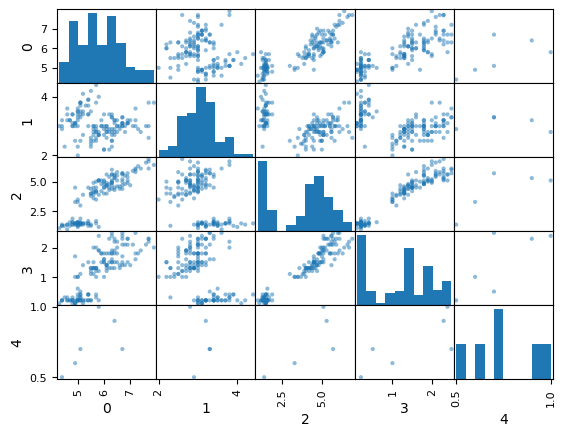

In [16]:
pd.plotting.scatter_matrix(x); #la répartition des données s'effectue en deux groupes distinct et elle est linéaire pour certains attributs

In [18]:
x.isnull().sum()*100/n #pourcentage de valeurs manquantes
n,p=x.corr().shape

5 5


In [55]:
def droiteRegression(x,idxy):
    correlation = x.corr()# calcul de la corrélation
    
    idxSel=np.delete(np.arange(x.shape[1]),idxy) # supprime l'attribut idxy des coefficients
    idxx=np.abs(correlation.loc[idxy,idxSel]).idxmax() # sélectionne la meilleure corrélation
    
    a=correlation.loc[idxy,idxx]/np.var(x.loc[:,idxy])
    b=np.mean(x.loc[:,idxx])- a*np.mean(x.loc[:,idxy])                                    
    

    return (a,b,idxx)

print(droiteRegression(x,2))

(0.3110410908994098, 0.021577150562301917, 3)


1.2896014277856218 -3.7218582569690732 2


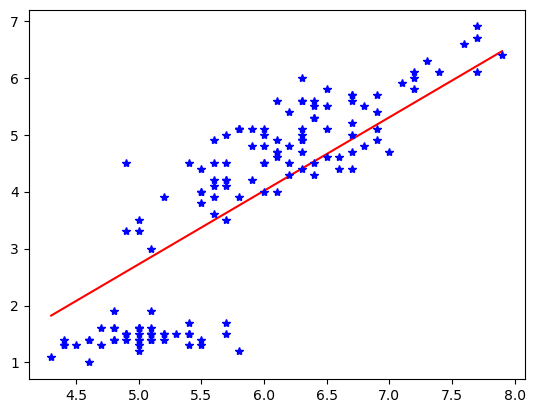

In [70]:
idxy=0 # sélection d'un attribut
a,b,idxx=droiteRegression(x,idxy) # appel de la fonction
print(a,b,idxx)
# afficher la figure pour les axes idxx et idxy :
# 1) calcul des points extrêmes pour l'affichage de
# la droite de régression
x1= min(x.loc[:,idxy])
y1=a*x1+b
x2=max(x.loc[:,idxy])
y2=a*x2+b
plt.plot([x1,x2],[y1,y2],'-r');
# 2) affichage des points
plt.plot(x.loc[:,idxy],x.loc[:,idxx],'*b');